#Diabetes Prediction 

In [69]:
#Imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn.model_selection as model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

##Data Wrangling and Cleaning 

In [ ]:
#Data
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


'Outcome' is our dependent variable where 0 represents a non-diabetic and 1 represents a diabetic. 

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There are no null values but we need to deal with zero-values of blood pressure, skin thickness and BMI as them being zero makes no sense. 

In [ ]:
#Blood pressure = 0
df[df['BloodPressure']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


Since the data set is not huge, removing the rows with zero-values of blood pressure, BMI and skin-thickness will result in loss of data, so the best way to do this is to impute the mean. The first step to doing that is to switch the zeros with NaN.  

In [ ]:
df.loc[df.BloodPressure ==0, 'BloodPressure'] = np.nan


In [ ]:
#imputing the mean to NaN values 

mean_bp = df['BloodPressure'].mean()
df.fillna(mean_bp,axis=1, inplace=True)
df[df['BloodPressure']==0]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [ ]:
#BMI = 0
df.loc[df.BMI ==0, 'BMI'] = np.nan
#imputing the mean 
mean_bmi = df['BMI'].mean()
df.fillna(mean_bmi, axis=1, inplace=True)
df[df['BMI']==0]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [ ]:
#SkinThickness = 0
df.loc[df.SkinThickness ==0, 'SkinThickness'] = np.nan
#imputing the mean 
mean_SkinThickness = df['SkinThickness'].mean()
df.fillna(mean_SkinThickness, axis=1, inplace=True)
df[df['SkinThickness']==0]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


If insulin = 0, that could mean that the subject has dangerously low levels of insulin which is medically relevant. But zero-glucose values make no sense.  <br>


In [ ]:
#Glucose = 0
df.loc[df.Glucose ==0, 'Glucose'] = np.nan
#imputing the mean 
mean_Glucose = df['Glucose'].mean()
df.fillna(mean_Glucose, axis=1, inplace=True)
df[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


## Exploratory Data Analysis 
 We will first split the dataset into Diabetics and Non-diabetics.

In [ ]:
diabetics = df[df['Outcome']== 1]
diabetics.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,0,33.6,0.627,50,1
2,8,183.0,64.0,29.15342,0,23.3,0.672,32,1
4,0,137.0,40.0,35.00000,168,43.1,2.288,33,1
6,3,78.0,50.0,32.00000,88,31.0,0.248,26,1
8,2,197.0,70.0,45.00000,543,30.5,0.158,53,1


In [ ]:
non_diabetics = df[df['Outcome']==0]
non_diabetics.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.000000,29.00000,0,26.6,0.351,31,0
3,1,89.0,66.000000,23.00000,94,28.1,0.167,21,0
5,5,116.0,74.000000,29.15342,0,25.6,0.201,30,0
7,10,115.0,72.405184,29.15342,0,35.3,0.134,29,0
10,4,110.0,92.000000,29.15342,0,37.6,0.191,30,0


In [ ]:
# Number of diabetics and non-diabetics
diabetics.shape

(268, 9)

In [ ]:
non_diabetics.shape

(500, 9)

There are 268- diabetics and 500- non-diabetics. To have equal representation, we can create a random sample of non-diabetics. 

In [ ]:
non_diabetics= non_diabetics.sample(268)

In [ ]:
# To find correlations in the data 

df = diabetics.append(non_diabetics)
df.shape

(536, 9)

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.122860,0.226906,0.060883,-0.076704,0.005044,-0.038667,0.551142,0.265662
Glucose,0.122860,1.000000,0.217952,0.236324,0.314461,0.262162,0.130071,0.272573,0.520063
BloodPressure,0.226906,0.217952,1.000000,0.197199,-0.072630,0.272992,-0.013793,0.342356,0.199939
SkinThickness,0.060883,0.236324,0.197199,1.000000,0.129757,0.564557,0.104692,0.132953,0.271214
Insulin,-0.076704,0.314461,-0.072630,0.129757,1.000000,0.157331,0.127152,-0.009682,0.104318
BMI,0.005044,0.262162,0.272992,0.564557,0.157331,1.000000,0.158068,0.030465,0.343899
DiabetesPedigreeFunction,-0.038667,0.130071,-0.013793,0.104692,0.127152,0.158068,1.000000,0.001581,0.177645
Age,0.551142,0.272573,0.342356,0.132953,-0.009682,0.030465,0.001581,1.000000,0.307941
Outcome,0.265662,0.520063,0.199939,0.271214,0.104318,0.343899,0.177645,0.307941,1.000000


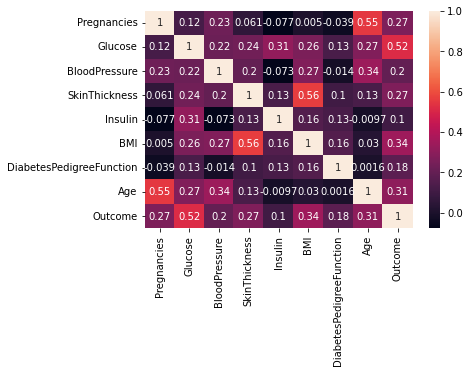

In [ ]:
sns.heatmap(data= df.corr(), annot=True)

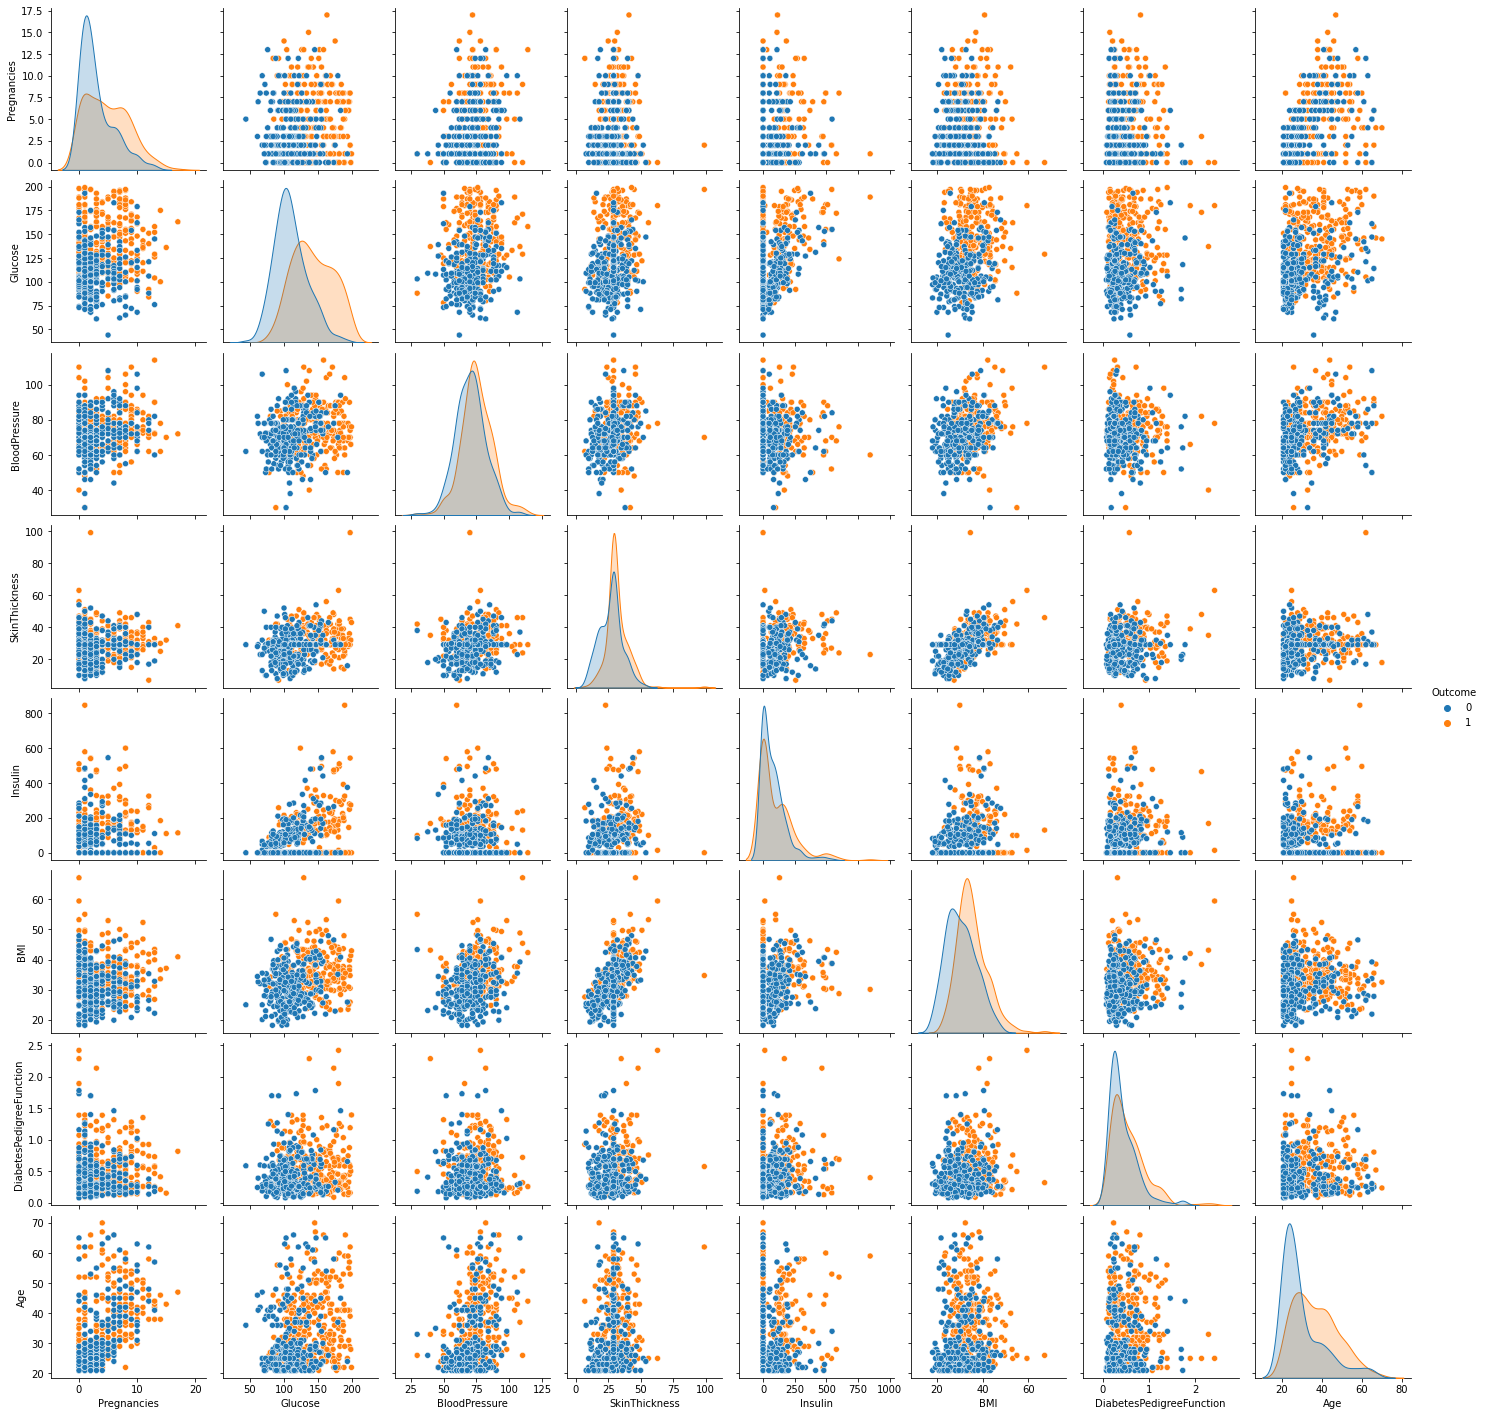

In [ ]:
sns.pairplot(data=df, hue = 'Outcome')

In [ ]:
diabetics.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,-0.053791,0.138310,-0.094955,-0.078563,-0.134442,-0.069195,0.444987,NaN
Glucose,-0.053791,1.000000,0.101374,0.085333,0.260260,0.055096,0.027463,0.112003,NaN
BloodPressure,0.138310,0.101374,1.000000,0.065233,-0.101991,0.234208,-0.054823,0.288243,NaN
SkinThickness,-0.094955,0.085333,0.065233,1.000000,0.129559,0.434385,0.163640,-0.067137,NaN
Insulin,-0.078563,0.260260,-0.101991,0.129559,1.000000,0.034023,0.101565,0.023944,NaN
BMI,-0.134442,0.055096,0.234208,0.434385,0.034023,1.000000,0.120513,-0.190473,NaN
DiabetesPedigreeFunction,-0.069195,0.027463,-0.054823,0.163640,0.101565,0.120513,1.000000,-0.088119,NaN
Age,0.444987,0.112003,0.288243,-0.067137,0.023944,-0.190473,-0.088119,1.000000,NaN
Outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


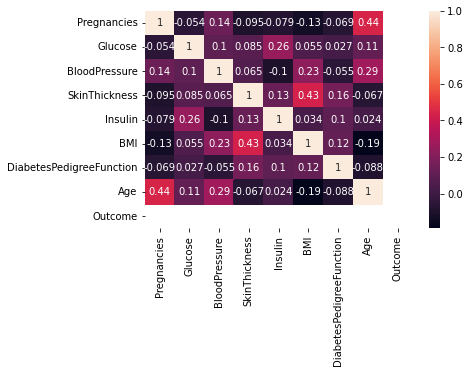

In [ ]:
#Diabetic correlations
sns.heatmap(diabetics.corr(), annot=True)

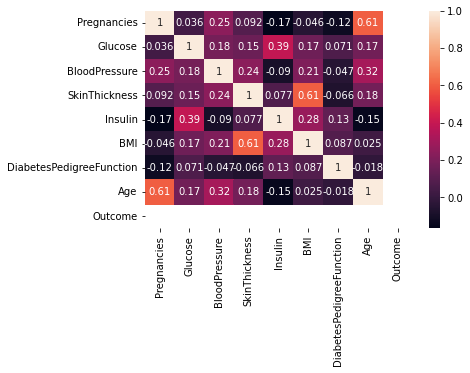

In [ ]:
#Non-diabetic correlations
sns.heatmap(non_diabetics.corr(),annot=True)

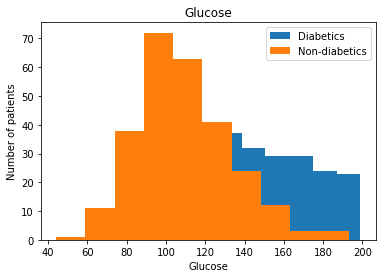

In [ ]:
# Glucose looks for diabetics and non-diabetics 

plt.hist(diabetics['Glucose'], label='Diabetics')
plt.hist(non_diabetics['Glucose'], label= 'Non-diabetics')
plt.xlabel('Glucose')
plt.ylabel('Number of patients')
plt.title('Glucose')
plt.legend()

Clearly, diabetics have a higher glucose value. 

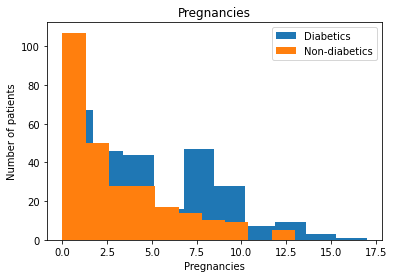

In [ ]:
#pregnancies
plt.hist(diabetics['Pregnancies'], label='Diabetics')
plt.hist(non_diabetics['Pregnancies'], label= 'Non-diabetics')
plt.xlabel('Pregnancies')
plt.ylabel('Number of patients')
plt.title('Pregnancies')
plt.legend()

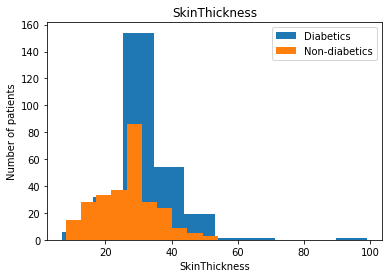

In [ ]:
#skin thickness
plt.hist(diabetics['SkinThickness'], label='Diabetics')
plt.hist(non_diabetics['SkinThickness'], label= 'Non-diabetics')
plt.xlabel('SkinThickness')
plt.ylabel('Number of patients')
plt.title('SkinThickness')
plt.legend()

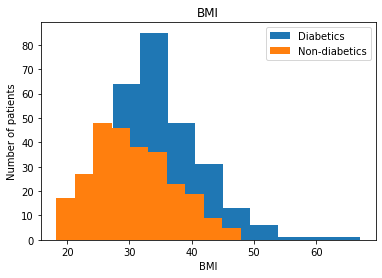

In [ ]:
# BMI
plt.hist(diabetics['BMI'], label='Diabetics')
plt.hist(non_diabetics['BMI'], label= 'Non-diabetics')
plt.xlabel('BMI')
plt.ylabel('Number of patients')
plt.title('BMI')
plt.legend()

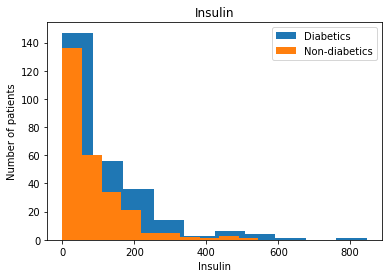

In [ ]:
# Insulin
plt.hist(diabetics['Insulin'], label='Diabetics')
plt.hist(non_diabetics['Insulin'], label= 'Non-diabetics')
plt.xlabel('Insulin')
plt.ylabel('Number of patients')
plt.title('Insulin')
plt.legend()

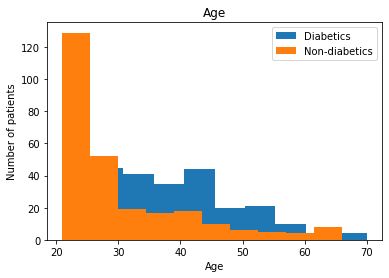

In [ ]:
# Age
plt.hist(diabetics['Age'], label='Diabetics')
plt.hist(non_diabetics['Age'], label= 'Non-diabetics')
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.title('Age')
plt.legend()

## Data Pre-processing
 The data will be processed for Random Forest, Adaboost and Gradient boost, and since Adaboost and Gradient Boosting are sensitive to outliers, we need to remove outliers.  

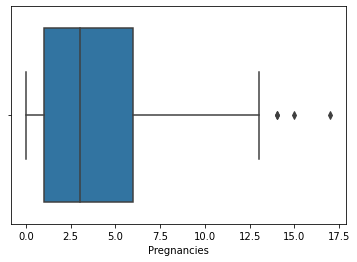

In [ ]:
sns.boxplot(x= df['Pregnancies'])

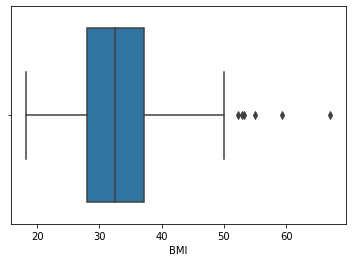

In [ ]:
sns.boxplot(x= df['BMI'])

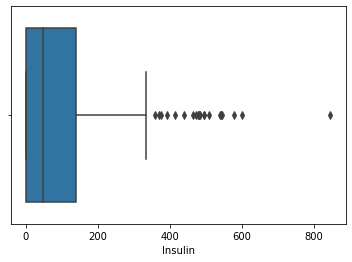

In [ ]:
sns.boxplot(x= df['Insulin'])

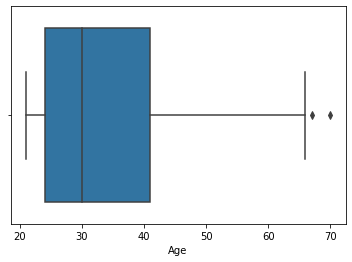

In [ ]:
sns.boxplot(x= df['Age'])

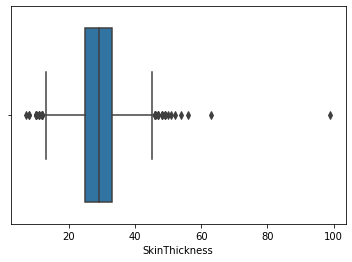

In [ ]:
sns.boxplot(x= df['SkinThickness'])

We need to remove the outlier at SkinThickness = 0 as it will skew the boosting results. 

In [ ]:
#outlier
df[df['SkinThickness']>= 90]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197.0,70.0,99.0,0,34.7,0.575,62,1


In [ ]:
df = df[df['SkinThickness'] != 99]

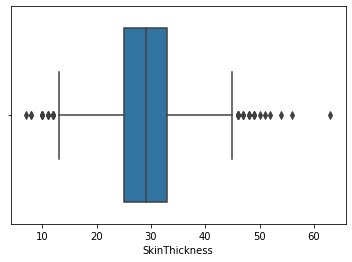

In [ ]:
sns.boxplot(x= df['SkinThickness'])

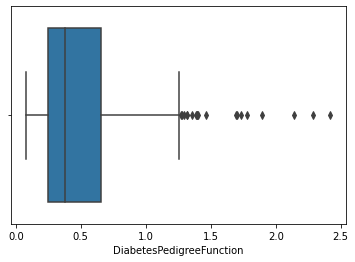

In [ ]:
sns.boxplot(x= df['DiabetesPedigreeFunction'])

Given the nature of diabetes, very high BMIs, Insulin values and Diabetes Pedigree Functions are plausible. Also people over the age of 80 could have diabetes. 

## Splitting the data into training and test set

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Modelling
 The models will be created using Random Forest, Adaboost and Gradient Boosting. We tried using GridSearchCV to determine the optimal number of estimators to use but it took several hours to grid search. 

In [ ]:
param_grid = {'n_estimators':np.arange(320,330), 'max_depth':np.arange(1,100)}
forest_test = RandomForestClassifier(random_state=9)
forest_cv= GridSearchCV(forest_test,param_grid,cv=5)
forest_cv.fit(X_train,y_train)

print("Best Score for Random Forest:" + str(forest_cv.best_score_))
print("Best Parameters for Random Forest: " + str(forest_cv.best_params_))



Best Score for Random Forest:0.7711627906976745
Best Parameters for Random Forest: {'max_depth': 7, 'n_estimators': 326}


In [ ]:
param_grid = {'n_estimators':np.arange(1,100), 'learning_rate':np.arange(0.05, 1, 0.05)}
ada_test = AdaBoostClassifier(random_state=9)
ada_cv= GridSearchCV(ada_test,param_grid,cv=5)
ada_cv.fit(X_train,y_train)

print("Best Score for AdaBoost:" + str(ada_cv.best_score_))
print("Best Parameters for AdaBoost: " + str(ada_cv.best_params_))


Best Score for AdaBoost:0.7874965800273598
Best Parameters for AdaBoost: {'learning_rate': 0.15000000000000002, 'n_estimators': 54}


In [ ]:
param_grid = {'n_estimators':np.arange(1,100), 'max_depth':np.arange(1,10), 'learning_rate':np.arange(0.05, 1, 0.05)}
grad_test = GradientBoostingClassifier(random_state=9)
grad_cv= GridSearchCV(grad_test,param_grid,cv=5)
grad_cv.fit(X_train,y_train)

print("Best Score for Gradient Boosting:" + str(grad_cv.best_score_))
print("Best Parameters for Gradient Boosting: " + str(grad_cv.best_params_))

#Best Score for Gradient Boosting:0.8031737346101231
#Best Parameters for Gradient Boosting: {'learning_rate': 0.9500000000000001, 'max_depth': 8, 'n_estimators': 40}

Best Score for Gradient Boosting:0.7757045143638852
Best Parameters for Gradient Boosting: {'learning_rate': 0.8, 'max_depth': 1, 'n_estimators': 41}


Each classifier with n_estimators as chosen by GridSearchCV will be created. 

In [ ]:
random_forest= RandomForestClassifier(n_estimators=326,max_depth=7, criterion='entropy', bootstrap=True)

In [ ]:
ada= AdaBoostClassifier(n_estimators=54,learning_rate=0.15)

In [ ]:
grad_boost= GradientBoostingClassifier(n_estimators=41, learning_rate=0.8)

In [ ]:
random_forest.fit(X_train,y_train)
y_rf_pred = random_forest.predict(X_test)

In [ ]:
ada.fit(X_train,y_train)
y_ada_pred = ada.predict(X_test)

In [ ]:
grad_boost.fit(X_train,y_train)
y_grad_pred = grad_boost.predict(X_test)

In [ ]:
print("Accuracy of Random Forest:", accuracy_score(y_test, y_rf_pred))
print("Accuracy of AdaBoost:", accuracy_score(y_test, y_ada_pred))
print("Accuracy of Gradient Boosting:", accuracy_score(y_test, y_grad_pred))

Accuracy of Random Forest: 0.822429906542056
Accuracy of AdaBoost: 0.8317757009345794
Accuracy of Gradient Boosting: 0.7289719626168224


In [ ]:
print("Precision of Random Forest:", precision_score(y_test, y_rf_pred))
print("Precision of AdaBoost:", precision_score(y_test, y_ada_pred))
print("Precision of Gradient Boosting:", precision_score(y_test, y_grad_pred))

Precision of Random Forest: 0.82
Precision of AdaBoost: 0.8235294117647058
Precision of Gradient Boosting: 0.7391304347826086


Among Random Forest, Ada Boost and Gradient Boosting, looks like Ada boost is slightly more accurate and precise compared to Random Forest. Let's check if SVM or Logistic regression could yield a better model. 

In [ ]:
#SVM
svm_cl = svm.SVC(kernel='linear')
svm_cl.fit(X_train,y_train)
y_svm_pred = svm_cl.predict(X_test)

print("Accuracy of SVM:", accuracy_score(y_test, y_svm_pred))
print("Precision of SVM:", precision_score(y_test, y_svm_pred))


Accuracy of SVM: 0.8037383177570093
Precision of SVM: 0.8


In [ ]:
#Logistic Regression 
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_log_pred = log_reg.predict(X_test)

print("Accuracy of Logistic Regression:", accuracy_score(y_test, y_log_pred))
print("Precision of Logistic Regression:", precision_score(y_test, y_log_pred))


Accuracy of Logistic Regression: 0.8130841121495327
Precision of Logistic Regression: 0.8163265306122449


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#comparing accuracy and precession of the classifiers

x1 = ['Random Forest', 'AdaBoost', 'Gradient Boost', 'SVM', 'Logistic Regression']
y1 = [accuracy_score(y_test,y_rf_pred), accuracy_score(y_test,y_ada_pred),
      accuracy_score(y_test, y_grad_pred), accuracy_score(y_test,y_svm_pred),
      accuracy_score(y_test, y_log_pred)]

Text(0.5, 0, 'Accuracy')

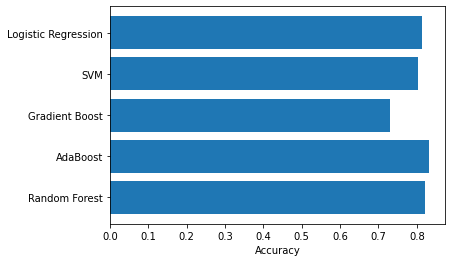

In [ ]:
plt.barh(x1,y1)
plt.xlabel('Accuracy')

In [ ]:
x1 = ['Random Forest', 'AdaBoost', 'Gradient Boost', 'SVM', 'Logistic Regression']
y1 = [precision_score(y_test,y_rf_pred), precision_score(y_test,y_ada_pred),
      precision_score(y_test, y_grad_pred), precision_score(y_test,y_svm_pred),
      precision_score(y_test, y_log_pred)]

Text(0.5, 0, 'Precision')

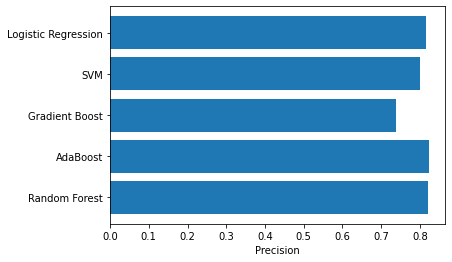

In [ ]:
plt.barh(x1,y1)
plt.xlabel('Precision')

AdaBoost seems to be the most accurate and precise model for detecting diabetes in the given dataset. 

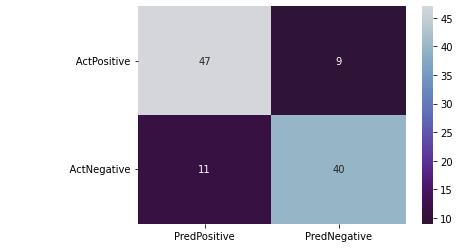

In [71]:
#confusion matrix
confusion_log = confusion_matrix(y_test, y_log_pred)
sns.heatmap(confusion_log, annot=True, center=50, cmap="twilight_shifted", xticklabels=['PredPositive','PredNegative'],
           yticklabels=['                      ActPositive','                    ActNegative'])
